<a href="https://colab.research.google.com/github/Jenny000327/Data_analysis/blob/main/%EC%87%BC%ED%95%91_%EC%9D%B8%EC%82%AC%EC%9D%B4%ED%8A%B8_%EB%B6%84%EC%95%BC%EB%B3%84_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EC%A1%B0%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 쇼핑 인사이트 분야별 트렌드 조회회

### 쇼핑 인사이트 분야별 트렌드 조회 API이용
 패션의류, 화장품/미용 분야의 2023년 1월부터 2023년 3월까지 월간 검색 클릭 추이 조회.

In [21]:
import os
import sys
import urllib.request
import json

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"

url = "https://openapi.naver.com/v1/datalab/shopping/categories"

body = {
    "startDate": "2023-01-01",
    "endDate": "2023-03-31",
    "timeUnit": "month",
    "category": [
        {"name": "패션의류", "param": ["50000000"]},
        {"name": "화장품/미용", "param": ["50000002"]}
    ],
    "device": "",
    "gender": "",
    "ages": []
}

body = json.dumps(body, ensure_ascii=False)

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
request.add_header("Content-Type", "application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if rescode == 200:
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)


{"startDate":"2023-01-01","endDate":"2023-03-31","timeUnit":"month","results":[{"title":"패션의류","category":["50000000"],"data":[{"period":"2023-01-01","ratio":82.24699},{"period":"2023-02-01","ratio":88.23913},{"period":"2023-03-01","ratio":100}]},{"title":"화장품/미용","category":["50000002"],"data":[{"period":"2023-01-01","ratio":58.50948},{"period":"2023-02-01","ratio":68.6013},{"period":"2023-03-01","ratio":59.72884}]}]}


### 위의 코드를 판다스 dataframe 사용해서 정리.

In [22]:
import os
import sys
import urllib.request
import json
import pandas as pd

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"

url = "https://openapi.naver.com/v1/datalab/shopping/categories"

body = {
    "startDate": "2023-01-01",
    "endDate": "2023-03-31",
    "timeUnit": "month",
    "category": [
        {"name": "패션의류", "param": ["50000000"]},
        {"name": "화장품/미용", "param": ["50000002"]}
    ],
    "device": "",
    "gender": "",
    "ages": []
}

body = json.dumps(body, ensure_ascii=False)

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
request.add_header("Content-Type", "application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if rescode == 200:
    response_body = response.read()
    data = json.loads(response_body)
else:
    print("Error Code:" + rescode)

results = []

for result in data['results']:
    category_name = result['title']
    for item in result['data']:
        period = item['period']
        ratio = item['ratio']
        results.append([category_name, period, ratio])

df = pd.DataFrame(results, columns=['Category', 'Period', 'Ratio'])
print(df)


  Category      Period      Ratio
0     패션의류  2023-01-01   82.24699
1     패션의류  2023-02-01   88.23913
2     패션의류  2023-03-01  100.00000
3   화장품/미용  2023-01-01   58.50948
4   화장품/미용  2023-02-01   68.60130
5   화장품/미용  2023-03-01   59.72884


### matplotlib과 seaborn 이용해서 막대그래프로 시각화

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyth

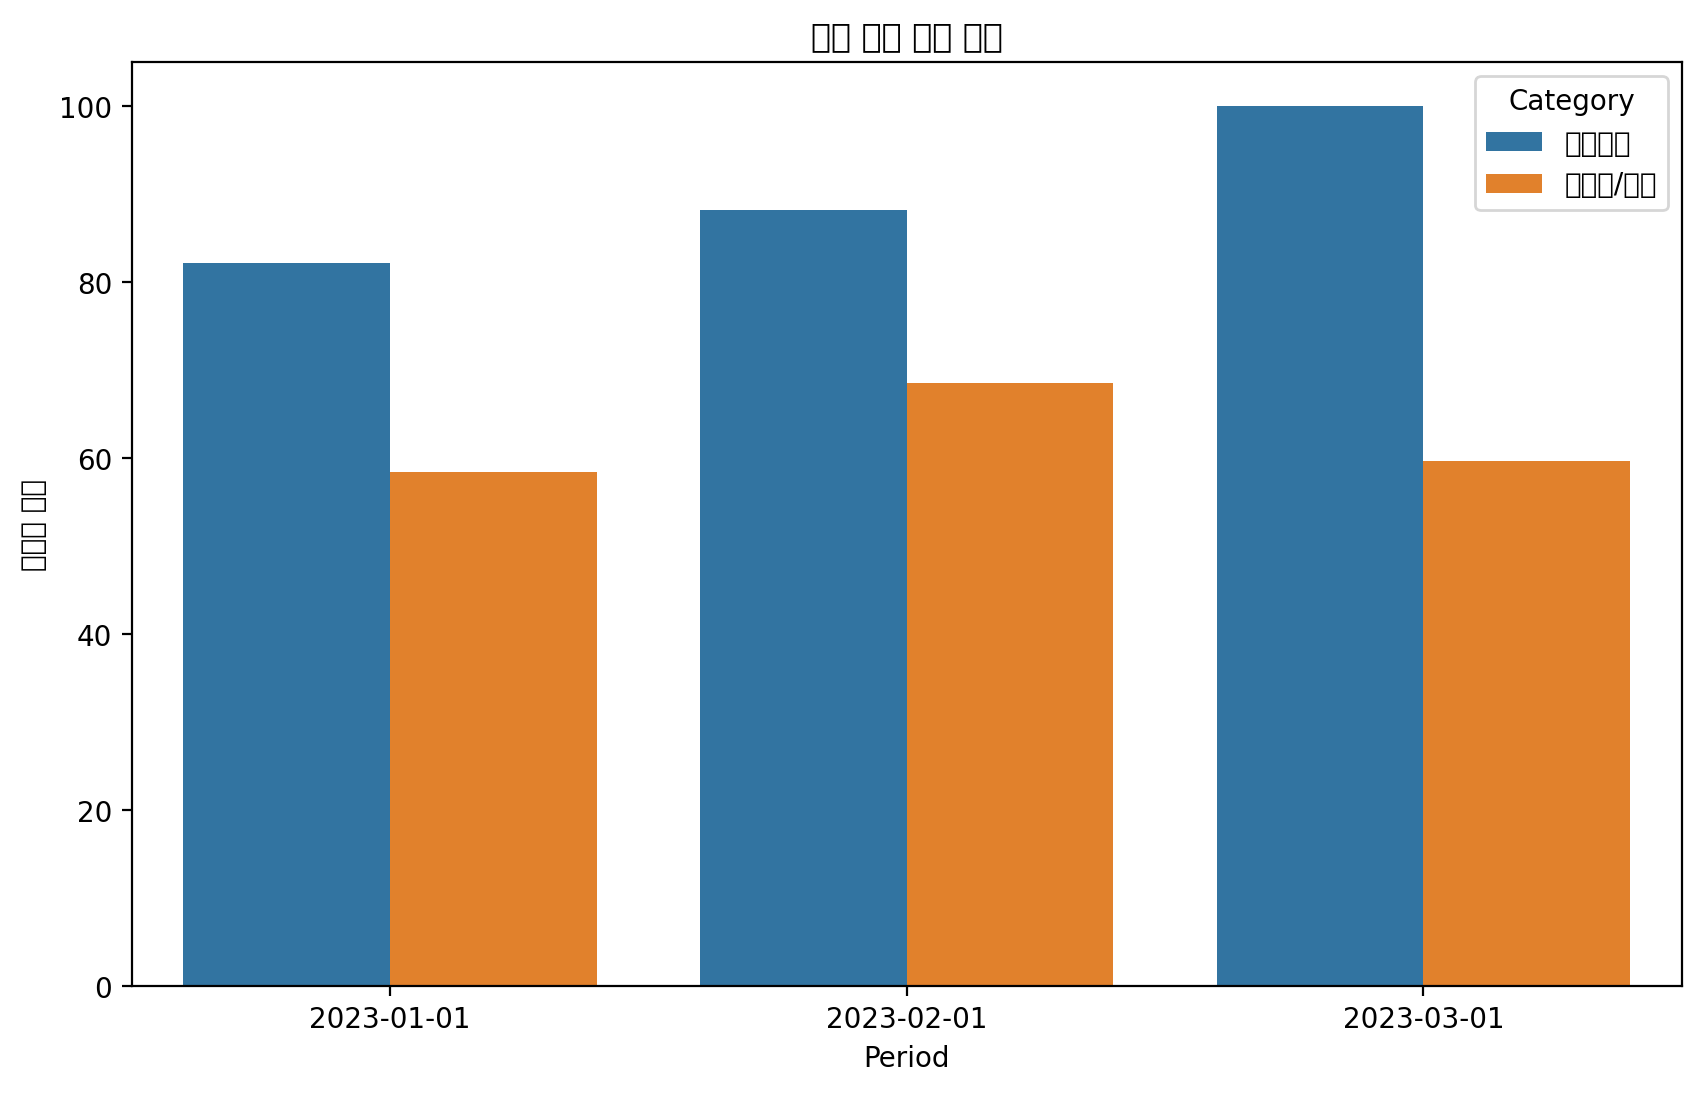

In [23]:
import os
import sys
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"

url = "https://openapi.naver.com/v1/datalab/shopping/categories"

body = {
    "startDate": "2023-01-01",
    "endDate": "2023-03-31",
    "timeUnit": "month",
    "category": [
        {"name": "패션의류", "param": ["50000000"]},
        {"name": "화장품/미용", "param": ["50000002"]}
    ],
    "device": "",
    "gender": "",
    "ages": []
}

body = json.dumps(body, ensure_ascii=False)

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
request.add_header("Content-Type", "application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if rescode == 200:
    response_body = response.read()
    data = json.loads(response_body)
else:
    print("Error Code:" + rescode)

results = []

for result in data['results']:
    category_name = result['title']
    for item in result['data']:
        period = item['period']
        ratio = item['ratio']
        results.append([category_name, period, ratio])

df = pd.DataFrame(results, columns=['Category', 'Period', 'Ratio'])

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Ratio', hue='Category', data=df)
plt.title('월별 검색 클릭 추이')
plt.ylabel('상대적 비율')
plt.show()


# 2. 오류 수정

 ### 2.1 한글 폰트가 깨져서 나와.. 방법 1

 폰트를 설정해야해.

In [24]:
!apt-get update -qq
!apt-get install -qq fonts-nanum


In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 설치된 폰트 확인
sys_font = fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font: {nanum_font}")

# 폰트 설정
path = nanum_font[0]  # 사용할 폰트의 경로 (본인의 환경에 맞게 수정)
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

# 폰트 적용 및 렌더링 엔진 변경
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
%config InlineBackend.figure_format = 'retina'  # 그래프 해상도 향상


nanum_font: ['/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf']


### 2.2 위에 방법 썼는데도 계속 깨져서 나와... 다른 방법 2


밑에 방법은 이미지로 텍스트를 변환하고 이미지로 표시하는 방법.

In [26]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


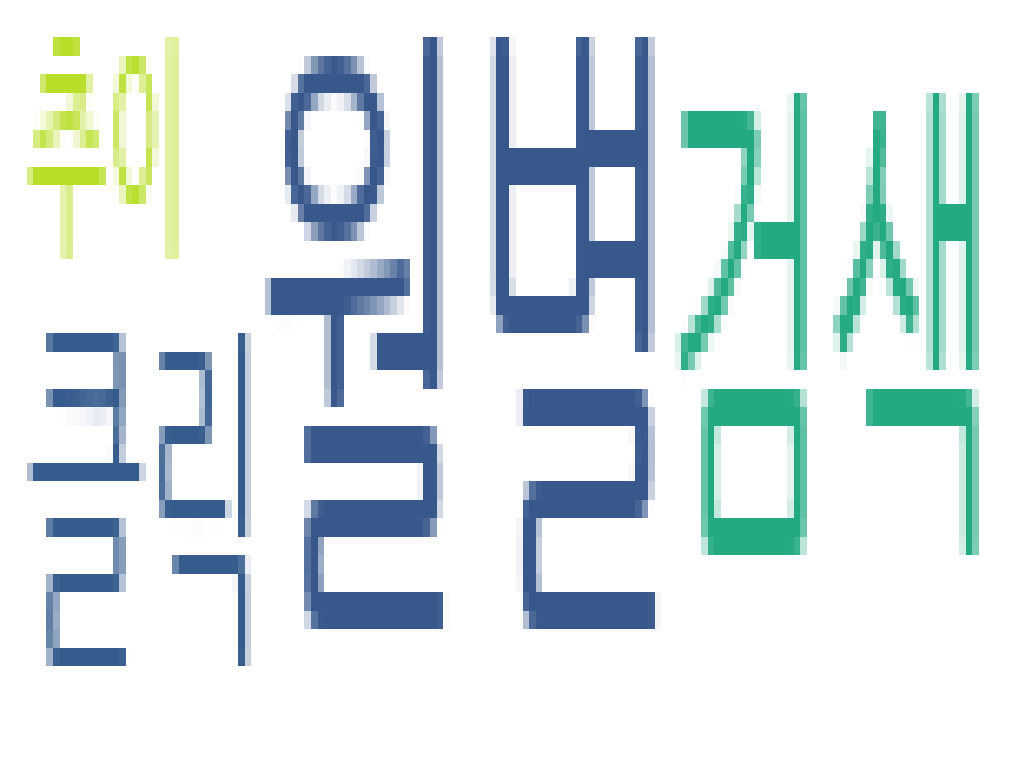

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def text_image(text, width=400, height=200):
    wc = WordCloud(font_path='path/to/your/font/NanumGothic.ttf',
                   width=width,
                   height=height,
                   background_color='white',
                   max_words=1000,
                   prefer_horizontal=1,
                   relative_scaling=0.5)
    wc.generate(text)
    return wc.to_image()

text = "월별 검색 클릭 추이"
title_image = text_image(text, width=150, height=40)
plt.imshow(title_image, aspect='auto', interpolation='nearest')
plt.axis('off')
plt.show()



### 2.3 뭐지 어떻게 하는거지.. 둘다 실패


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyth

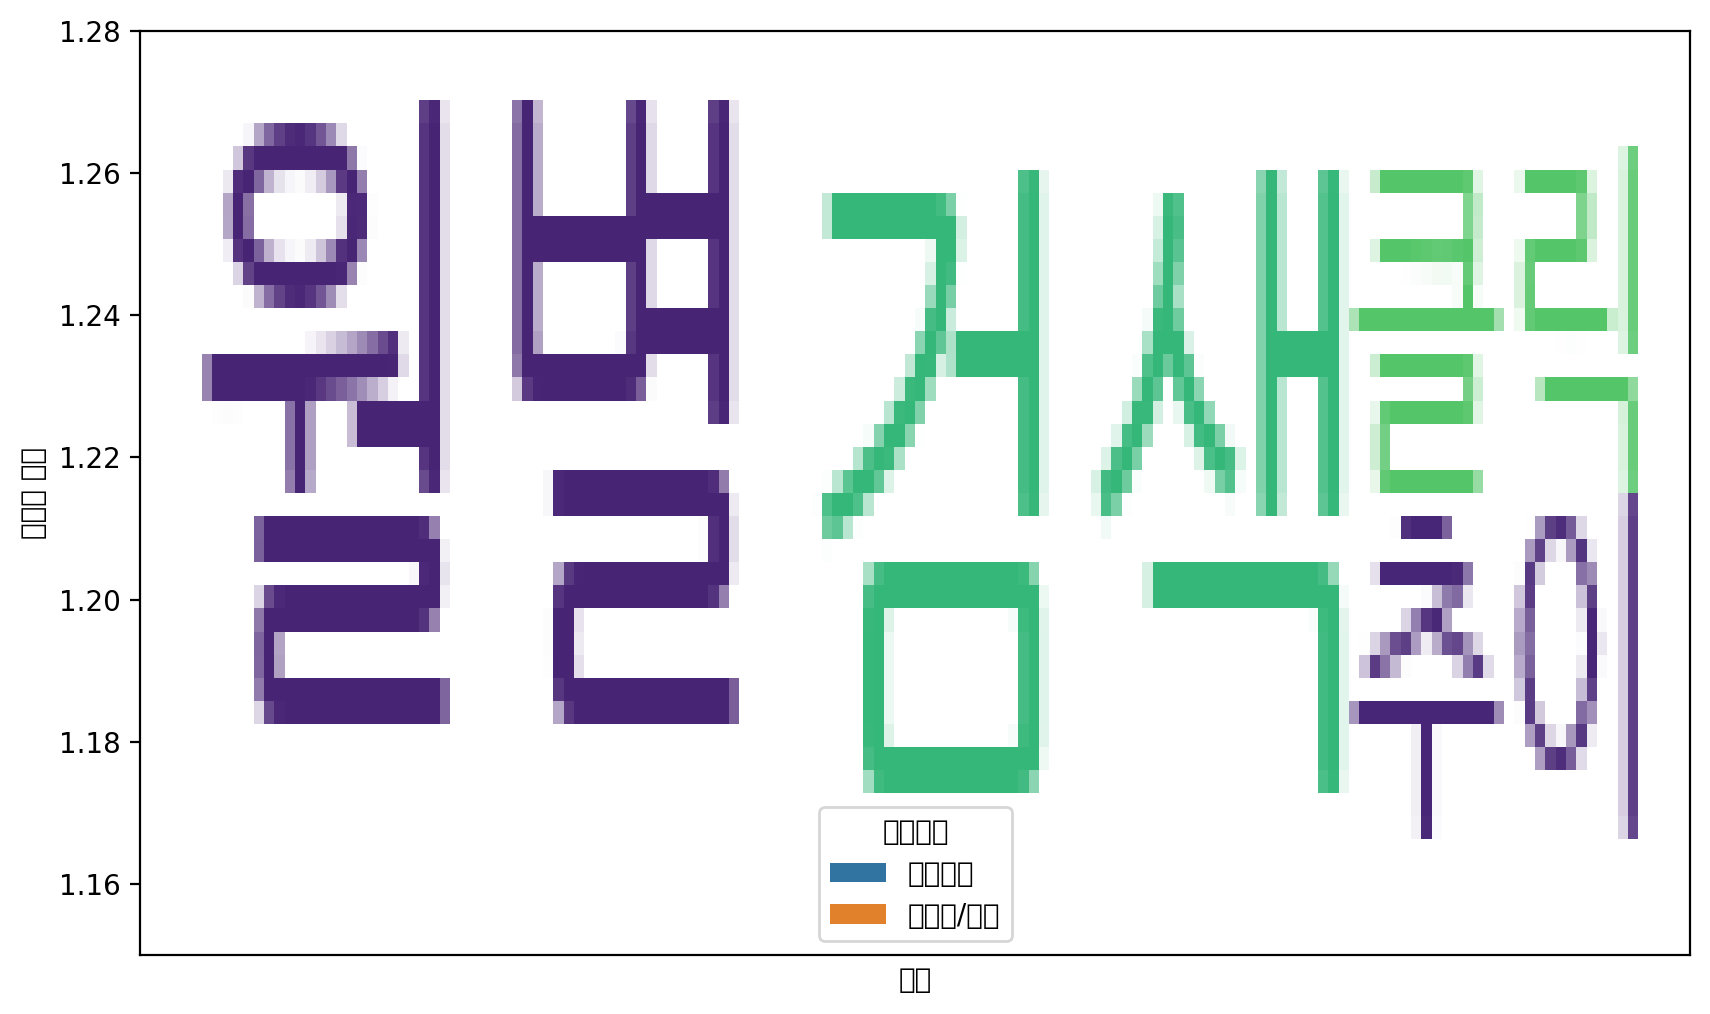

In [28]:
import os
import sys
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

client_id = "0T1JOYIqKWNOC8o1_6pM"
client_secret = "rkfbCrzxzA"

url = "https://openapi.naver.com/v1/datalab/shopping/categories"

body = {
    "startDate": "2023-01-01",
    "endDate": "2023-03-31",
    "timeUnit": "month",
    "category": [
        {"name": "패션의류", "param": ["50000000"]},
        {"name": "화장품/미용", "param": ["50000002"]}
    ],
    "device": "",
    "gender": "",
    "ages": []
}

body = json.dumps(body, ensure_ascii=False)

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
request.add_header("Content-Type", "application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if rescode == 200:
    response_body = response.read()
    data = json.loads(response_body)
else:
    print("Error Code:" + rescode)

results = []

for result in data['results']:
    category_name = result['title']
    for item in result['data']:
        period = item['period']
        ratio = item['ratio']
        results.append([category_name, period, ratio])

df = pd.DataFrame(results, columns=['Category', 'Period', 'Ratio'])

# 한글 텍스트를 이미지로 변환하는 함수
def text_image(text, width=400, height=200):
    wc = WordCloud(font_path='path/to/your/font/NanumGothic.ttf',
                   width=width,
                   height=height,
                   background_color='white',
                   max_words=1000,
                   prefer_horizontal=1,
                   relative_scaling=0.5)
    wc.generate(text)
    return wc.to_image()

# 그래프 제목용 이미지 생성
text = "월별 검색 클릭 추이"
title_image = text_image(text, width=150, height=40)

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Ratio', hue='Category', data=df)

# 제목 이미지 추가
plt.gca().add_artist(plt.annotate('', xy=(0.5, 1.05), xycoords='axes fraction',
                                  xytext=(0.5, 1.2), textcoords='axes fraction',
                                  arrowprops=dict(arrowstyle="-",
                                                  edgecolor='black',
                                                  alpha=0),
                                  bbox=dict(boxstyle="square",
                                            edgecolor='white',
                                            facecolor='white',
                                            alpha=0),
                                  annotation_clip=False))
plt.gca().add_artist(plt.imshow(title_image, aspect='auto', extent=(0.3, 0.7, 1.15, 1.28), zorder=1, alpha=1, origin='upper', clip_on=False))

# 레이블 설정
plt.ylabel('상대적 비율')
plt.xlabel('기간')
plt.legend(title='카테고리')

# 그래프를 화면에 출력
plt.show()



왓....
